In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-yield-of-a-farm/crop_yield_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/crop-yield-of-a-farm/crop_yield_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rainfall_mm         3000 non-null   int64
 1   soil_quality_index  3000 non-null   int64
 2   farm_size_hectares  3000 non-null   int64
 3   sunlight_hours      3000 non-null   int64
 4   fertilizer_kg       3000 non-null   int64
 5   crop_yield          3000 non-null   int64
dtypes: int64(6)
memory usage: 140.8 KB


In [4]:
df.head()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554


<Axes: >

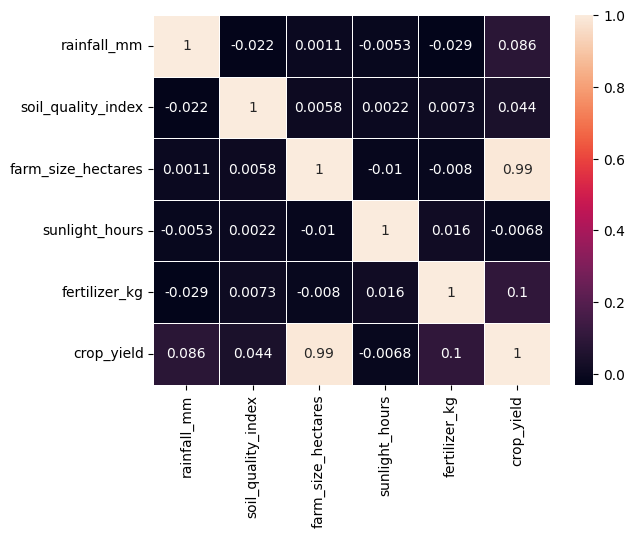

In [7]:
sns.heatmap(df.corr(), linewidth=.4, linecolor='white',annot=True)

In [14]:
from sklearn.preprocessing import KBinsDiscretizer

bins = KBinsDiscretizer(n_bins=5, encode='ordinal',strategy='uniform')
bins.fit_transform(df.sunlight_hours.values.reshape(-1,1))

array([[4.],
       [4.],
       [0.],
       ...,
       [1.],
       [4.],
       [4.]])

In [16]:
pd.cut(df.sunlight_hours, 4)

0       (10.0, 12.0]
1       (10.0, 12.0]
2       (3.992, 6.0]
3         (6.0, 8.0]
4       (3.992, 6.0]
            ...     
2995    (10.0, 12.0]
2996    (3.992, 6.0]
2997      (6.0, 8.0]
2998    (10.0, 12.0]
2999    (10.0, 12.0]
Name: sunlight_hours, Length: 3000, dtype: category
Categories (4, interval[float64, right]): [(3.992, 6.0] < (6.0, 8.0] < (8.0, 10.0] < (10.0, 12.0]]

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [19]:
from sklearn.model_selection import KFold,cross_val_score,train_test_split

x = df.drop(columns='crop_yield')
y = df.crop_yield

for i in x.columns.tolist():
    x[i] = bins.fit_transform(x[i].values.reshape(-1,1))
    


In [21]:
kf = KFold(n_splits=6,shuffle=True, random_state=1)
n_score = {}
for i in range(1,10):
    knn = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(knn, x,y, cv=kf)
    n_score[i] = score.mean()

In [27]:
n_score

{1: 0.8761617566740582,
 2: 0.9033579341384317,
 3: 0.9180089694001987,
 4: 0.9250143660477735,
 5: 0.930418450115507,
 6: 0.932830401481142,
 7: 0.9347931161241633,
 8: 0.935191548356101,
 9: 0.9356127958212008}